# Episode 02: Is this Data Science?

### MovieStatsFlow loads the movie metadata CSV file into a Pandas Dataframe and computes some movie genre specific statistics. You can use this notebook and the Metaflow client to eyeball the results and make some simple plots. 

## Import the metaflow client

In [1]:
from metaflow import Flow, get_metadata
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/home/hunk/Documentos/Programação/Netfilx/metaflow/metaflow-tutorials


## Get the movie statistics from the latest run of MovieStatsFlow

In [4]:
run = Flow('MovieStatsFlow').latest_successful_run
print("Using run: %s" % str(run))

genre_stats = run.data.genre_stats

Using run: Run('MovieStatsFlow/1576162439389490')


## Create a bar plot of the median gross box office for the top-5 grossing genres

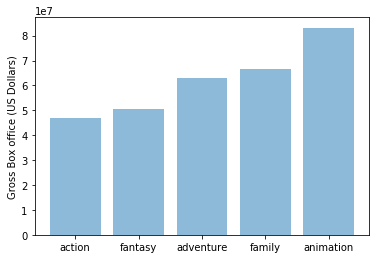

In [5]:
# Get median for each genre
data = [(genre, data['quartiles'][1]) \
        for genre, data \
        in genre_stats.items()]

# Sort and unpack into a list of labels, and medians
genre, median = zip(*[(genre, median)\
                      for genre, median\
                      in sorted(data, key=lambda pair: pair[1])])

# Create the bar plot
plt.bar(genre[-5:], median[-5:], align='center', alpha=0.5)
plt.ylabel("Gross Box office (US Dollars)")
plt.show()